In [36]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import os
import re

In [37]:
dict_params = {}
dataframes = {}
i = 0
for foldername, foldchildren, filechildren in os.walk('./results/v02'):
    if 'julia' in foldername:
        continue
    
    if len(filechildren) > 0:
        for file in filechildren:
            regex = "evaluation"
            # print(foldername)
            if re.search(regex, foldername):
                split = foldername.replace('n_steps','n-steps').replace('\\','/').split('/')
                filename = os.path.join(foldername, file) 

                model = split[3]
                params = split[5].split('_')

                r ={'model':model}
                for p in params:
                    x = p.split('=')
                    r[x[0]] = float(x[1])

                if dict_params.get(foldername) is None:
                    dict_params[foldername] = r
                    dataframes[foldername] = []

                dataframes[foldername].append(pd.read_csv(filename, parse_dates=[0], index_col=0))

                print(model, params, filename)

ACTOR_CRITIC ['learning-rate=0.25', 'decay-rate=0.25', 'n-steps=4', 'tuple-size=160'] ./results/v02\ACTOR_CRITIC\evaluation\learning-rate=0.25_decay-rate=0.25_n-steps=4_tuple-size=160\checkpoint_1.csv
ACTOR_CRITIC ['learning-rate=0.25', 'decay-rate=0.25', 'n-steps=4', 'tuple-size=160'] ./results/v02\ACTOR_CRITIC\evaluation\learning-rate=0.25_decay-rate=0.25_n-steps=4_tuple-size=160\checkpoint_10.csv
ACTOR_CRITIC ['learning-rate=0.25', 'decay-rate=0.25', 'n-steps=4', 'tuple-size=160'] ./results/v02\ACTOR_CRITIC\evaluation\learning-rate=0.25_decay-rate=0.25_n-steps=4_tuple-size=160\checkpoint_11.csv
ACTOR_CRITIC ['learning-rate=0.25', 'decay-rate=0.25', 'n-steps=4', 'tuple-size=160'] ./results/v02\ACTOR_CRITIC\evaluation\learning-rate=0.25_decay-rate=0.25_n-steps=4_tuple-size=160\checkpoint_12.csv
ACTOR_CRITIC ['learning-rate=0.25', 'decay-rate=0.25', 'n-steps=4', 'tuple-size=160'] ./results/v02\ACTOR_CRITIC\evaluation\learning-rate=0.25_decay-rate=0.25_n-steps=4_tuple-size=160\checkpoin

In [38]:
results = {}
model = 'SARSA'

dfr = []
examples_cs = {}
examples_br = {}

for folder in dict_params:
    print(folder)
    example_cs = pd.DataFrame()
    example_br = pd.DataFrame()
    ghi = 0
    ratio = 0

    sghi = 0
    sref = 0#,[]
    smodel = 0#,[]
    c=0
    for df in dataframes[folder]:
        if df.ghi.sum() > ghi:
            example_cs = df.copy()
            ghi = df.ghi.sum()

        if df.POA.sum()/df.mg.sum() > ratio:
            example_br = df.copy()
            ratio = df.POA.sum()/df.mg.sum() 

        sghi += df.ghi.sum()
        sref += df.mg.sum()# [df.mg.sum()/df.ghi.sum()]
        smodel += df.POA.sum()# [df.POA.sum()/df.ghi.sum()]
        c+=1

    examples_cs[folder] = example_cs
    examples_br[folder] = example_br
        
    r =  dict_params[folder]


    r['model_transp'] = smodel/sghi# np.median(smodel)
    r['ref_transp'] = sref/sghi# np.median(sref)
    r['days'] = c


    dfr.append(r)

./results/v02\ACTOR_CRITIC\evaluation\learning-rate=0.25_decay-rate=0.25_n-steps=4_tuple-size=160
./results/v02\ACTOR_CRITIC\evaluation\learning-rate=0.5_decay-rate=0.5_n-steps=1_tuple-size=160
./results/v02\ACTOR_CRITIC\evaluation\learning-rate=0.5_decay-rate=0.5_n-steps=2_tuple-size=160
./results/v02\ACTOR_CRITIC\evaluation\learning-rate=0.5_decay-rate=0.5_n-steps=4_tuple-size=160
./results/v02\ACTOR_CRITIC\evaluation\learning-rate=0.5_decay-rate=0.7_n-steps=8_tuple-size=20
./results/v02\ACTOR_CRITIC\evaluation\learning-rate=0.7_decay-rate=0.5_n-steps=16_tuple-size=160
./results/v02\ACTOR_CRITIC\evaluation\learning-rate=0.7_decay-rate=0.5_n-steps=1_tuple-size=160
./results/v02\ACTOR_CRITIC\evaluation\learning-rate=0.7_decay-rate=0.5_n-steps=2_tuple-size=160
./results/v02\ACTOR_CRITIC\evaluation\learning-rate=0.7_decay-rate=0.5_n-steps=4_tuple-size=160
./results/v02\ACTOR_CRITIC\evaluation\learning-rate=0.7_decay-rate=0.5_n-steps=8_tuple-size=160
./results/v02\ACTOR_CRITIC\evaluation\

In [39]:
dffinal = pd.DataFrame.from_records(dfr).assign(ratio = lambda dfx: dfx.model_transp/dfx.ref_transp)
dffinal.query('days > 1').sort_values('ratio', ascending=False).head(10)

,model,learning-rate,decay-rate,n-steps,tuple-size,model_transp,ref_transp,days,epsilon,forget-factor,ratio
455,WQNN,0.90,0.25,NaN,160.0,1.099492,1.107895,25,0.98,0.25,0.992415
285,SARSA,0.25,0.25,4.0,160.0,1.091863,1.107895,25,0.90,NaN,0.985529
290,SARSA,0.70,0.50,4.0,40.0,1.087566,1.107895,25,0.90,NaN,0.981651
449,WQNN,0.70,0.25,NaN,40.0,1.086130,1.107895,25,0.98,0.98,0.980355
250,SARSA,0.25,0.25,4.0,80.0,1.085867,1.107895,25,0.98,NaN,0.980118
428,WQNN,0.25,0.25,NaN,40.0,1.084552,1.107895,25,0.70,0.25,0.978931
267,SARSA,0.70,0.90,4.0,80.0,1.081555,1.107895,25,0.98,NaN,0.976226
286,SARSA,0.25,0.50,2.0,80.0,1.081068,1.107895,25,0.90,NaN,0.975785
456,WQNN,0.90,0.70,NaN,160.0,1.080478,1.107895,25,0.98,0.25,0.975253
284,SARSA,0.25,0.25,1.0,80.0,1.080442,1.107895,25,0.90,NaN,0.975221


In [40]:
dffinal.query('days > 1').groupby('model').count()[['days']]

,days
model,
ACTOR_CRITIC,5
REINFORCE,21
SARSA,273
WQNN,160


In [41]:
dffinal.query('days > 1').groupby('model').max()[['ratio']]

,ratio
model,
ACTOR_CRITIC,0.918784
REINFORCE,0.906748
SARSA,0.985529
WQNN,0.992415


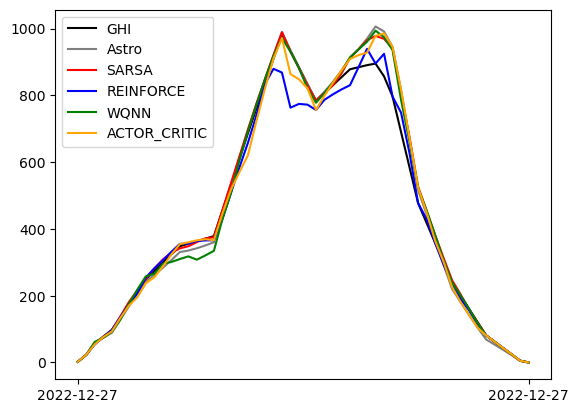

In [42]:
n = 25
a = dffinal.query('days > 1 and model == "SARSA"').sort_values('ratio', ascending=False).reset_index().iloc[0]
df = pd.read_csv(f'results/v02/SARSA/evaluation/epsilon={a["epsilon"]}_learning-rate={a["learning-rate"]}_decay-rate={a["decay-rate"]}_n_steps={int(a["n-steps"])}_tuple-size={int(a["tuple-size"])}/checkpoint_{n}.csv', parse_dates=['ts'], index_col='ts')
df = df.query('mg > 0')
plt.plot(df.index, df.ghi, label = 'GHI', c='black')
plt.plot(df.index, df.mg, label = 'Astro', c='grey')
plt.plot(df.index, df.POA, label = 'SARSA', c='red')

a = dffinal.query('days > 1 and model == "REINFORCE"').sort_values('ratio', ascending=False).reset_index().iloc[0]
df = pd.read_csv(f'results/v02/REINFORCE/evaluation/learning-rate={a["learning-rate"]}_decay-rate={a["decay-rate"]}_tuple-size={int(a["tuple-size"])}/checkpoint_{n}.csv', parse_dates=['ts'], index_col='ts')
df = df.query('mg > 0')
plt.plot(df.index, df.POA, label = 'REINFORCE', c='blue')

a = dffinal.query('days > 1 and model == "WQNN"').sort_values('ratio', ascending=False).reset_index().iloc[0]
df = pd.read_csv(f'results/v02/WQNN/evaluation/epsilon={a["epsilon"]}_learning-rate={a["learning-rate"]}_decay-rate={a["decay-rate"]}_forget-factor={a["forget-factor"]}_tuple-size={int(a["tuple-size"])}/checkpoint_{n}.csv', parse_dates=['ts'], index_col='ts')
df = df.query('mg > 0')
plt.plot(df.index, df.POA, label = 'WQNN', c='green')

m = "ACTOR_CRITIC"
a = dffinal.query(f'days > 1 and model == "{m}"').sort_values('ratio', ascending=False).reset_index().iloc[0]
df = pd.read_csv(f'results/v02/{m}/evaluation/learning-rate={a["learning-rate"]}_decay-rate={a["decay-rate"]}_n-steps={int(a["n-steps"])}_tuple-size={int(a["tuple-size"])}/checkpoint_{n}.csv', parse_dates=['ts'], index_col='ts')
df = df.query('mg > 0')
plt.plot(df.index, df.POA, label = m, c='orange')

plt.xticks([df.index.min(), df.index.max()])
plt.legend()

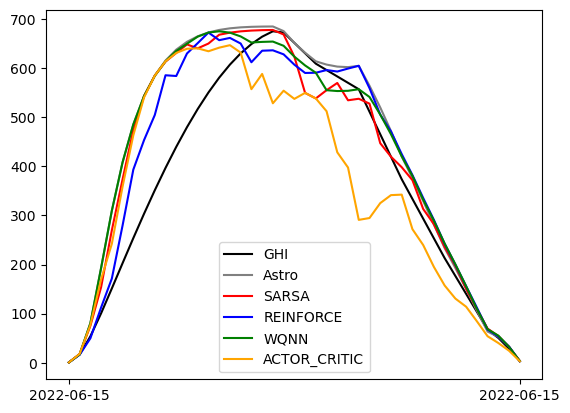

In [43]:
n=12
a = dffinal.query('days > 1 and model == "SARSA"').sort_values('ratio', ascending=False).reset_index().iloc[0]
df = pd.read_csv(f'results/v02/SARSA/evaluation/epsilon={a["epsilon"]}_learning-rate={a["learning-rate"]}_decay-rate={a["decay-rate"]}_n_steps={int(a["n-steps"])}_tuple-size={int(a["tuple-size"])}/checkpoint_{n}.csv', parse_dates=['ts'], index_col='ts')
df = df.query('mg > 0')
plt.plot(df.index, df.ghi, label = 'GHI', c='black')
plt.plot(df.index, df.mg, label = 'Astro', c='grey')
plt.plot(df.index, df.POA, label = 'SARSA', c='red')

a = dffinal.query('days > 1 and model == "REINFORCE"').sort_values('ratio', ascending=False).reset_index().iloc[0]
df = pd.read_csv(f'results/v02/REINFORCE/evaluation/learning-rate={a["learning-rate"]}_decay-rate={a["decay-rate"]}_tuple-size={int(a["tuple-size"])}/checkpoint_{n}.csv', parse_dates=['ts'], index_col='ts')
df = df.query('mg > 0')
plt.plot(df.index, df.POA, label = 'REINFORCE', c='blue')

a = dffinal.query('days > 1 and model == "WQNN"').sort_values('ratio', ascending=False).reset_index().iloc[0]
df = pd.read_csv(f'results/v02/WQNN/evaluation/epsilon={a["epsilon"]}_learning-rate={a["learning-rate"]}_decay-rate={a["decay-rate"]}_forget-factor={a["forget-factor"]}_tuple-size={int(a["tuple-size"])}/checkpoint_{n}.csv', parse_dates=['ts'], index_col='ts')
df = df.query('mg > 0')
plt.plot(df.index, df.POA, label = 'WQNN', c='green')

m = "ACTOR_CRITIC"
a = dffinal.query(f'days > 1 and model == "{m}"').sort_values('ratio', ascending=False).reset_index().iloc[0]
df = pd.read_csv(f'results/v02/{m}/evaluation/learning-rate={a["learning-rate"]}_decay-rate={a["decay-rate"]}_n-steps={int(a["n-steps"])}_tuple-size={int(a["tuple-size"])}/checkpoint_{n}.csv', parse_dates=['ts'], index_col='ts')
df = df.query('mg > 0')
plt.plot(df.index, df.POA, label = m, c='orange')

plt.xticks([df.index.min(), df.index.max()])
plt.legend()

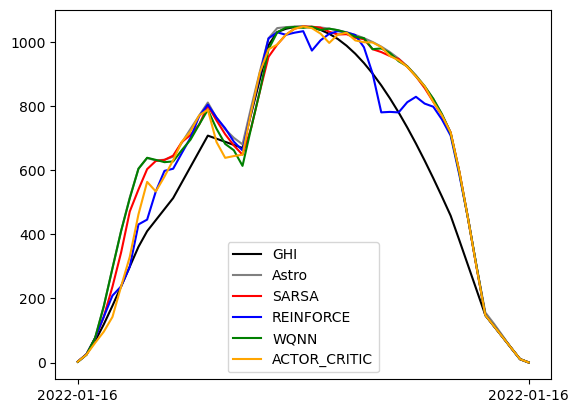

In [44]:
n=2
a = dffinal.query('days > 1 and model == "SARSA"').sort_values('ratio', ascending=False).reset_index().iloc[0]
df = pd.read_csv(f'results/v02/SARSA/evaluation/epsilon={a["epsilon"]}_learning-rate={a["learning-rate"]}_decay-rate={a["decay-rate"]}_n_steps={int(a["n-steps"])}_tuple-size={int(a["tuple-size"])}/checkpoint_{n}.csv', parse_dates=['ts'], index_col='ts')
df = df.query('mg > 0')
plt.plot(df.index, df.ghi, label = 'GHI', c='black')
plt.plot(df.index, df.mg, label = 'Astro', c='grey')
plt.plot(df.index, df.POA, label = 'SARSA', c='red')

a = dffinal.query('days > 1 and model == "REINFORCE"').sort_values('ratio', ascending=False).reset_index().iloc[0]
df = pd.read_csv(f'results/v02/REINFORCE/evaluation/learning-rate={a["learning-rate"]}_decay-rate={a["decay-rate"]}_tuple-size={int(a["tuple-size"])}/checkpoint_{n}.csv', parse_dates=['ts'], index_col='ts')
df = df.query('mg > 0')
plt.plot(df.index, df.POA, label = 'REINFORCE', c='blue')


a = dffinal.query('days > 1 and model == "WQNN"').sort_values('ratio', ascending=False).reset_index().iloc[0]
df = pd.read_csv(f'results/v02/WQNN/evaluation/epsilon={a["epsilon"]}_learning-rate={a["learning-rate"]}_decay-rate={a["decay-rate"]}_forget-factor={a["forget-factor"]}_tuple-size={int(a["tuple-size"])}/checkpoint_{n}.csv', parse_dates=['ts'], index_col='ts')
df = df.query('mg > 0')
plt.plot(df.index, df.POA, label = 'WQNN', c='green')

m = "ACTOR_CRITIC"
a = dffinal.query(f'days > 1 and model == "{m}"').sort_values('ratio', ascending=False).reset_index().iloc[0]
df = pd.read_csv(f'results/v02/{m}/evaluation/learning-rate={a["learning-rate"]}_decay-rate={a["decay-rate"]}_n-steps={int(a["n-steps"])}_tuple-size={int(a["tuple-size"])}/checkpoint_{n}.csv', parse_dates=['ts'], index_col='ts')
df = df.query('mg > 0')
plt.plot(df.index, df.POA, label = m, c='orange')

plt.xticks([df.index.min(), df.index.max()])
plt.legend()